In [3]:
%matplotlib inline

In [36]:
from nose.tools import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing, metrics

In [5]:
np.random.seed(1234)

# Logistic Regression - Model Training and Improvement
## Comparing and selecting models

### 1. Read the data 
Read the Portuguese bank dataset [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00222/).

Read the dataset using `pandas` (you can use the library with the alias `pd`). Save it in the `bank_data` variable.

In [6]:
bank_data = pd.read_csv('data/bank.csv', sep=";")

In [7]:
    
   
assert_is_not_none(bank_data)

The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. That is denoted by "Y" - the outcome variable

In [35]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


### 2. Preprocess the data
Separate explanatory features from labels. Save all features (16 columns total) in the variable `bank_features`. Save the labels (corresponding to the `y` column) in the `bank_labels` variable. Rewrite the labels to be `0` and `1` instead of `no` and `yes`: `bank_labels` should be a numeric column.

In [8]:
bank_features = bank_data.drop("y", axis = 1) 
bank_labels = bank_data[["y"]]

In [9]:
bank_labels['y'].replace('yes', 1 ,inplace=True)
bank_labels['y'].replace('no', 0 ,inplace=True)


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
assert_is_not_none(bank_features)
assert_is_not_none(bank_labels)

In [11]:
cols_to_transform = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
bank_features = pd.get_dummies(data=bank_features, columns = cols_to_transform )

In [12]:
assert_equal(bank_features.shape, (4521, 51))

### 4. Split the data 
Split the data into training and testing set, with 70% of the data for training. Because the output labels are not equaly distributed, use stratification based on the `bank_labels`.

In [13]:
bank_features_train, bank_features_test, bank_labels_train, bank_labels_test = train_test_split(bank_features, bank_labels, stratify=bank_labels, train_size=0.7, test_size=0.3)
bank_labels_train = bank_labels_train['y']
bank_labels_test = bank_labels_test['y']

In [14]:
print("bank_labels_test shape: {}".format(bank_labels_test.shape))
print("bank_features_test shape: {}".format(bank_features_test.shape))
print("bank_labels_train shape: {}".format(bank_labels_train.shape))
print("bank_features_train shape: {}".format(bank_features_train.shape))


bank_labels_test shape: (1357,)
bank_features_test shape: (1357, 51)
bank_labels_train shape: (3164,)
bank_features_train shape: (3164, 51)


In [15]:
assert_is_not_none(bank_features_train)
assert_is_not_none(bank_labels_train)
assert_is_not_none(bank_features_test)
assert_is_not_none(bank_labels_test)

### 5. Train a baseline algorithm
Train a logistic regression using the training data. Use 1 000 000 (`1e6`) as the value of C. Score it using the testing data. Save the score in the `baseline_score` variable. You should see a fairly high score.

In [16]:
model = LogisticRegression(C=1e6).fit(bank_features_train, bank_labels_train)
baseline_score = model.score(bank_features_test, bank_labels_test)
baseline_score

0.899042004421518

In [17]:
y_pred = model.predict(bank_features_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(bank_labels_test, y_pred) # == baseline_score
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(accuracy))

Accuracy of logistic regression classifier on test set: 0.89904


In [18]:
assert_is_not_none(model)
assert_greater(baseline_score, 0.7)

### 6. Select a better score
As you alrady saw, the positive examples are very few. If you aren't convinced, just check the counts.

We know that the default scoring (accuracy) isn't correct in this case. Better measures would be precision and recall. However, we only want one number. Evaluate the algorithm once again, using a standard scoring method which combines precision and recall. Overwrite the `baseline_score` variable.

Don't forget to score the model on the testing data only.

In [19]:
# accuracy as scoring is not suitable as there are few observation of class 1 (data is not balanced):
bank_labels['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

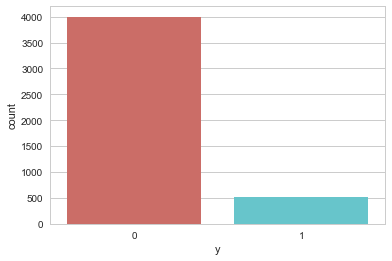

In [33]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='y', data=bank_labels, palette='hls')
plt.show()

In [55]:
# the same for precision and recall 
print("Precision: %4f" % metrics.precision_score(bank_labels_test, y_pred))
print("Recall: %4f" % metrics.recall_score(bank_labels_test, y_pred))

Precision: 0.623377
Recall: 0.307692


 F1 score conveys the balance between the precision and the recall.
 

In [59]:
print("F1: %4f" % metrics.f1_score(bank_labels_test, y_pred))

F1: 0.412017


The Average Precision Score is quite low:

In [53]:
print("Average Precision Score: %4f" % metrics.average_precision_score(bank_labels_test, y_pred))

Average Precision Score: 0.271396


In [28]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(bank_labels_test, y_pred)
print(confusion_matrix)

[[1172   29]
 [ 108   48]]


We have 1172 + 48 correct predictions and 29 + 108 false predictions

In [37]:
baseline_score = metrics.f1_score(bank_labels_test, y_pred)
baseline_score

0.41201716738197425

In [24]:
assert_less(baseline_score, 0.7)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(bank_labels_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.98      0.94      1201
          1       0.62      0.31      0.41       156

avg / total       0.88      0.90      0.88      1357



Interpretation: 
    Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. 
    Of the entire test set, 90% of the customer’s preferred term deposits that were promoted.

### 7. Tune your model 
Fine-tune the `C` and `max_iter` parameters.

Use full grid search with the following values:
* `C`: 0.0001, 0.01, 0.1, 1, 10, 100, 10000
* `max_iter`: 50, 100, 300, 1000
* `fit_itercept`: True, False

Save the grid search result in the `grid_search` variable. Don't forget to use the better scoring model that you obtained in the previous task.

In [42]:
param_grid = [
    {'C': [0.0001, 0.01, 0.1, 1, 10, 100, 10000], 'fit_intercept':[True, False], 'max_iter':[50, 100, 300, 1000]}
]
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, scoring = 'f1')
grid_search.fit(bank_features_train, bank_labels_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


{'C': 1, 'fit_intercept': True, 'max_iter': 50}
0.4508841456459461


In [43]:
grid_search.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
assert_is_not_none(grid_search)
assert_is_not_none(grid_search.best_estimator_)

### 8. Compare scores
Use the best estimator from your grid search. Score it using the function from problem 6. Save your answer in `tuned_score`.

In [49]:
optimized_model = grid_search.best_estimator_.fit(bank_features_train, bank_labels_train)

In [64]:
tuned_score = optimized_model.score(bank_features_test, bank_labels_test)

In [51]:
print(tuned_score)

0.8983050847457628


In [52]:
print(baseline_score - tuned_score)

-0.4862879173637885


Hmmmm, it seems we have not obtained a better algorithm, even the opposite (the difference is marginal and depends on the random initialization of the cross-validation datasets).

We can, of course, do a lot more things to improve our model's performance, such as normalizing the data, feature selection and feature engineering, trying out different aspects, e.g. polynomial terms, RANSAC; even boosting (we'll talk about this later). However, we'll stop at this point.

What can we conclude? It seems that this is close to the best performance we can get out of this algorithm, given these data points.

We can try improving (cleaning) our dataset, selecting features, etc. but we most likely need a better algorithm. In the next labs, we're going to explore that.